# Feature Engineering Assignment1 2020AIML003

# Import libs to perform EDA, data preparation, data cleanup, model etc

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read input data from the given adult data file

In [2]:
df = pd.read_csv("adult.data")

# Display first 20 records of the data frame

In [3]:
df.head(20)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Display last 20 records of the data frame

In [4]:
df.tail(20)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


# Display the number of columns (features) and records in the input file

In [5]:
df.shape

(32560, 15)

# As input data does NOT contain headers, we need to add a header row. Based on the supplementary information provided in the adult.names file, we name the columns

In [6]:
df = pd.read_csv("adult.data", names= ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary bin'])

# Now lets display first 20 records of the data frame again. This time along with the header rows...

In [7]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary bin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Lets see some statistical nature of the numerical data present

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary bin      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# We see that some of the columns (features) have unknown data types. Lets get more information of these categorical variables...

In [10]:
for (columnName, columnData) in df.iteritems(): 
    if((df[columnName].dtype) == "object"):
        print(columnName)
        print(df[columnName].unique())
        print("\n")

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


sex
[' Male' ' Female']


native-country
[' United-States' ' Cuba' ' Jamai

# We see that in columns 'workclass' and 'occupation' there are some unresolved '?'. Lets replace them inline with 'Unkown workclass' and 'Unknown occupation' instead

In [11]:
df['workclass']=df['workclass'].replace(' ?', 'Unknown workclasss')
df['occupation']=df['occupation'].replace(' ?', 'Unknown occupation')

# For each of the categorical variables, lets construct a bar chart against the target variable

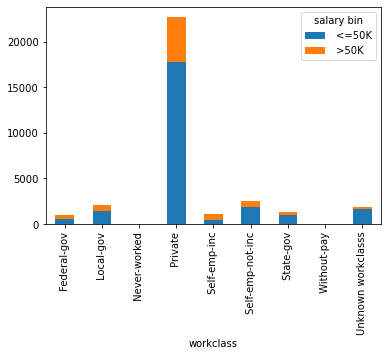

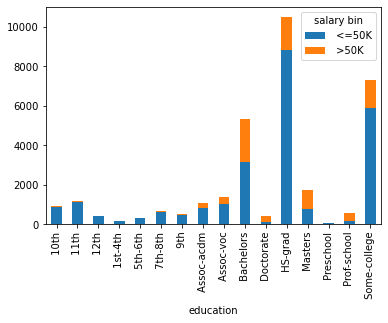

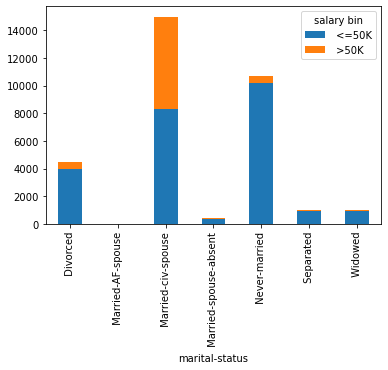

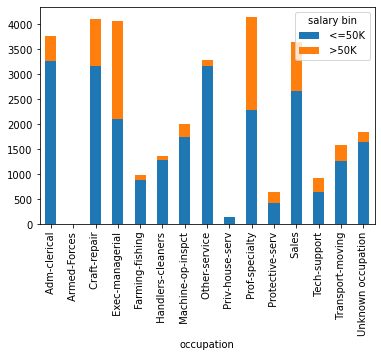

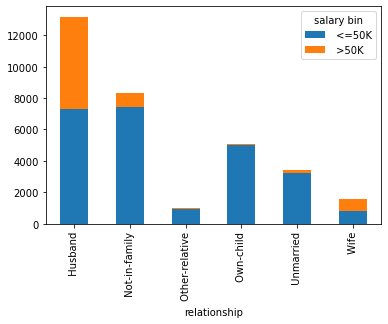

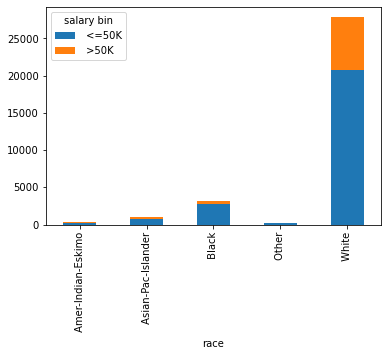

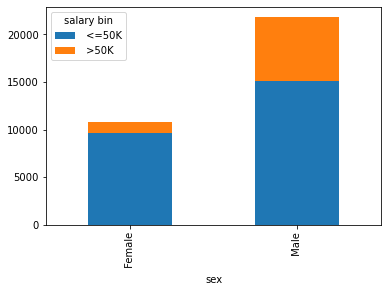

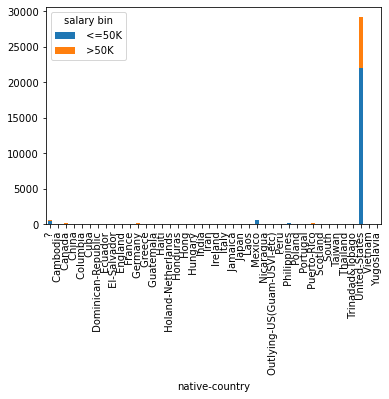

In [12]:
df.groupby(['workclass','salary bin']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(['education','salary bin']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(['marital-status','salary bin']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(['occupation','salary bin']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(['relationship','salary bin']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(['race','salary bin']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(['sex','salary bin']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(['native-country','salary bin']).size().unstack().plot(kind='bar', stacked=True)

# Inference from the above bar charts... 

The following feature values have strong relation to >50K salary: 
'Private'
'Bachelors', 'HS-Grad', 'Prof-school','Some-college', 
'Married-civ-spouse'
'Exec-managerial', 'Craft-repair', 'Prof-speciality', 'Sales', 'Adm-clerical'
'Husband'
'White'
'Male'
'United States'

# Next, let us see if there is any correlation between variables. For this, lets encode all non-numeric values to numeric values

In [13]:
df['workclass'] = df['workclass'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['marital-status'] = df['marital-status'].astype('category').cat.codes
df['occupation'] = df['occupation'].astype('category').cat.codes
df['relationship'] = df['relationship'].astype('category').cat.codes
df['race'] = df['race'].astype('category').cat.codes
df['sex'] = df['sex'].astype('category').cat.codes
df['native-country'] = df['native-country'].astype('category').cat.codes
df['salary bin'] = df['salary bin'].astype('category').cat.codes

In [14]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary bin
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.376371,1.897784e+05,10.298210,10.080679,2.611836,6.421762,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.582038,1.055500e+05,3.870264,2.572720,1.506222,4.328619,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


# Let's visualize some histograms of each feature data to understand their composition

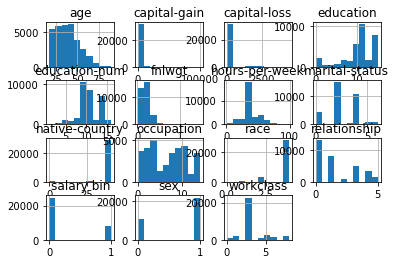

In [15]:
df.hist()
plt.show()

# Let's visualize the heat map to understand the correlation between all independent and dependent variables

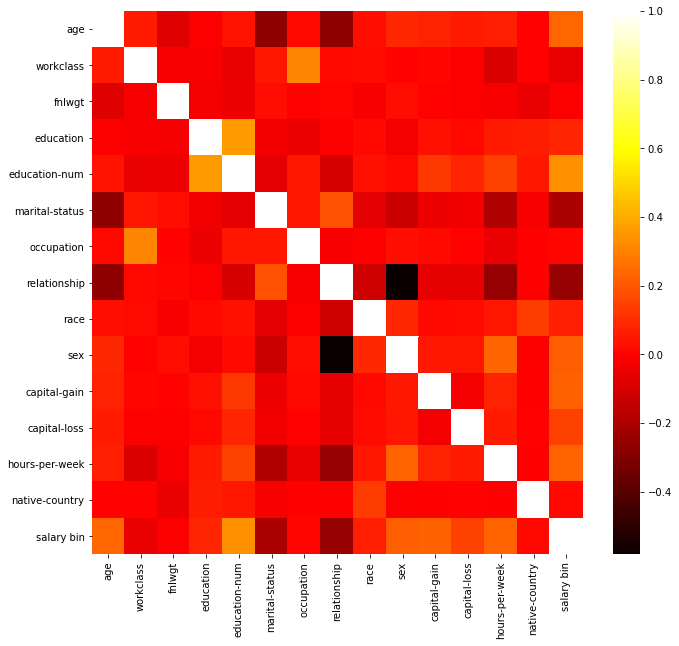

In [16]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(11, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="hot")

# Inference from the above heat map #

Lighter the shade, stronger the correlation between the variables... the following dependent variable pairs are seen to be strongly correlated in other words they are somewhat "synonymous" and hence one of the elements in the pair can be dropped as the other is redundant...

'education' and 'education-num', 
'workclass'and 'occupation', 
'sex' and 'relationship', 
'age' and 'marital-status', 
'age' and 'relationship'

Darker the shade, poorer the correlation between the variables... we see that 'salary bin' is poorly correlated with:
'education-num',
'marital-status',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week'

Based on this, we can drop the following features: 
'age',
'education-num' ,
'workclass' ,
'relationship',
'marital-status',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week'

In [17]:
df.drop(['age'], axis=1, inplace = True)
df.drop(['workclass'], axis=1, inplace = True)
df.drop(['education-num'], axis=1, inplace = True)
df.drop(['relationship'], axis=1, inplace = True)
df.drop(['marital-status'], axis=1, inplace = True)
df.drop(['sex'], axis=1, inplace = True)
df.drop(['capital-gain'], axis=1, inplace = True)
df.drop(['capital-loss'], axis=1, inplace = True)
df.drop(['hours-per-week'], axis=1, inplace = True)
df

,fnlwgt,education,occupation,race,native-country,salary bin
0,77516,9,0,4,39,0
1,83311,9,3,4,39,0
2,215646,11,5,4,39,0
3,234721,1,5,2,39,0
4,338409,9,9,2,5,0
...,...,...,...,...,...,...
32556,257302,7,12,4,39,0
32557,154374,11,6,4,39,1
32558,151910,11,0,4,39,0
32559,201490,11,0,4,39,0


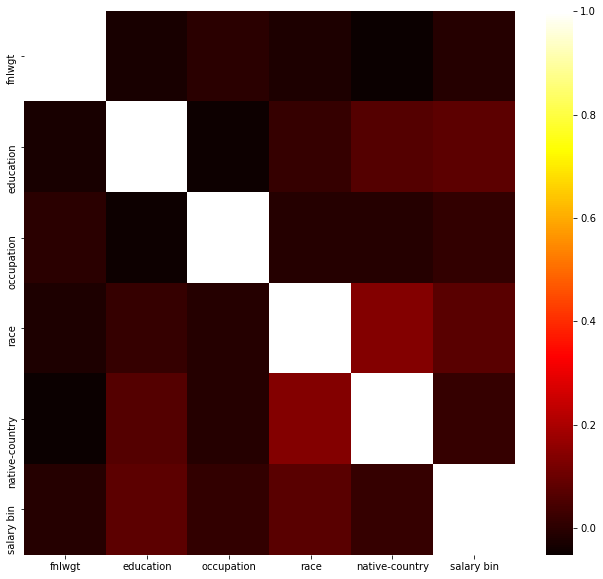

In [18]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(11, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="hot")

# Let's visualize some scatter diagrams to see relationship between all independent variables and dependent variable...

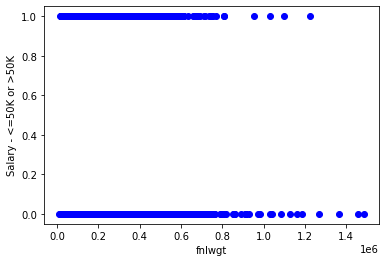

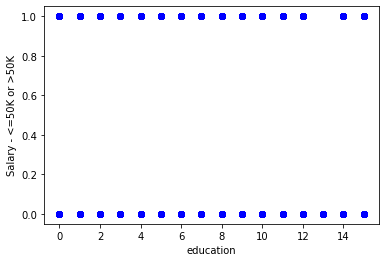

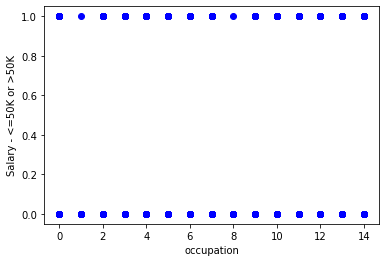

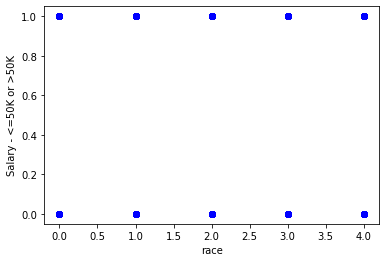

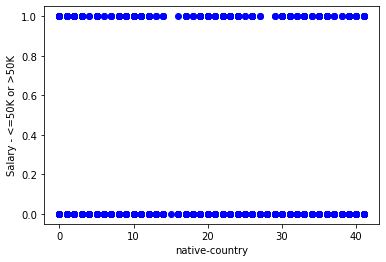

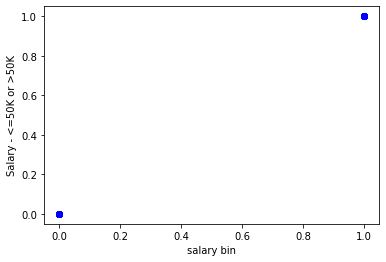

In [19]:
for (columnName, columnData) in df.iteritems(): 
    plt.xlabel(columnName) 
    plt.ylabel("Salary - <=50K or >50K") 
    plt.scatter(columnData,df['salary bin'], color='blue')
    plt.show()

# next lets see box plots for outliers

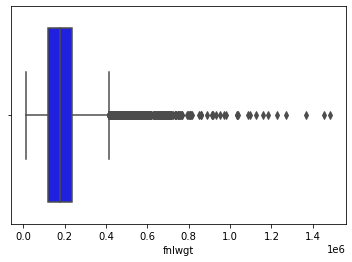

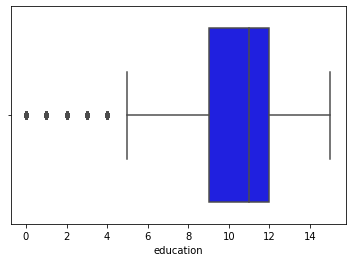

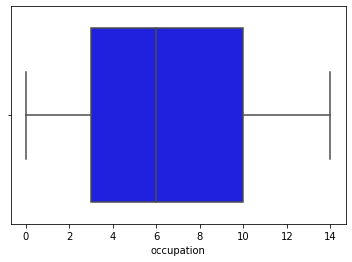

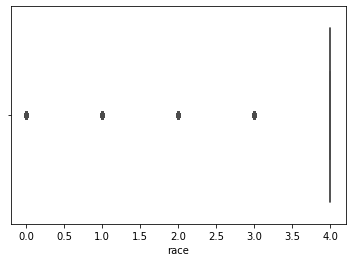

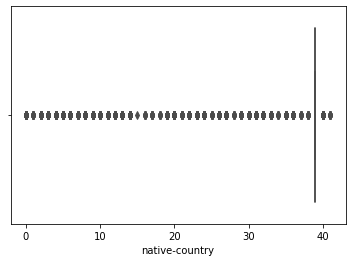

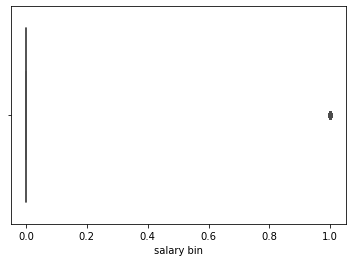

In [20]:
for (columnName, columnData) in df.iteritems(): 
    sns.boxplot(df[columnName], color="blue")
    plt.show()

# Inferences from the box plots 

Most of the data seems to be belonging 'education' values : HS-grad, Some-college, Bachelors, Masters (coded 9, 10, 11, 12)

Most of the data seems to be belonging to race "white" (coded value '4.0')

So, though the data given has ~35k records, the data seems to be collected in a skewed fashion. Would recommend reviewing if the data collected is somehow biased/skewed, so that the model works better.

# As all data analysis, data preparation and feature removal are done, lets proceed with modelling (Stochastic Gradient Descent model)

In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,5]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0) # split test and training data

sgdr = SGDRegressor() # invoke  Stochastic Gradient Descent Regressor
sgdr.fit(xtrain, ytrain) # fit the model with the training data
ypred = sgdr.predict(xtest) # predict through SGD the outcomes for the test data

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse) # mean squared error 
print("RMSE: ", mse*(1/2.0)) # variance score
print("R2 : ", r2_score(ytest, ypred)) # R^2 (coefficient of determination) regression score function.

MSE:  8.081898918447254e+35
RMSE:  4.040949459223627e+35
R2 :  -4.370452041219336e+36
